### Gaussian Discriminant Analysis (GDA)

- Assume two-classe case.


- $Q_k = ln(P(C_K)) - \frac{1}{2}(x-\mu_{K})^T\Sigma_{K}^{-1}(x-\mu_{K}) - \frac{1}{2}ln(|\Sigma_K|)$


- $\hat{y} = \begin{cases} Class\;0 \;\;\;\;, if \;Q_0(x) > Q_1(x) \\  Class\;1  \;\;\;\;, if \;Q_0(x) < Q_1(x) \\ DB  \;\;\;\; \;\;\;\;\;\;, if \;Q_0(x) = Q_1(x)\end{cases}$


- $P(C_0|x) = \frac{P(x|C_0)P(C_0)}{P(x|C_0)P(C_0)\;+\;P(x|C_1)P(C_1)} = \frac{1}{1+e^{-a}},\; a=ln(\frac{P(x|C_0)P(C_0)}{P(x|C_1)P(C_1)})$


- $P(C_1|x) = 1 - P(C_0|x)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from utils import plot_DB, plot_DR
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=100, centers=5, n_features=2, cluster_std=2, random_state=20)

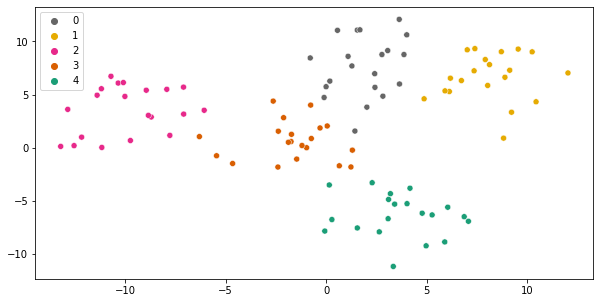

In [3]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Dark2_r');

## GDA

In [4]:
class GDA:
    def __init__(self, model='LDA'):
        self.model = model
        
    def calculate_likelihood(self, x, mu, sigma):
        # Calculate the likelihood of a sample belonging to a class, given the class mean and covariance
        k = mu.shape[0]  # number of dimensions
        sigma_inv = np.linalg.inv(sigma)
        term1 = 1 / (np.power((2 * np.pi), k / 2) * np.sqrt(np.linalg.det(sigma)))
        term2 = np.exp(-0.5 * (x - mu).T.dot(sigma_inv).dot(x - mu))
        return term1 * term2
    
    def fit(self, X, y):
        # Calculate the mean and covariance for each class, as well as the prior probabilities for each class
        self.classes = np.unique(y)
        self.mus = []
        self.covs = []
        self.priors = []
        for c in self.classes:
            X_c = X[y == c]
            mu = np.mean(X_c, axis=0)
            self.mus.append(mu)
            if 'lda' in self.model.lower():
                # In LDA, we assume that the covariance is the same for all classes
                self.covs.append(np.cov(X, rowvar=False))
            else:
                self.covs.append(np.cov(X_c, rowvar=False))
            self.priors.append(len(X_c) / len(X))
        
    def predict(self, X, prob=False):
        # Calculate the likelihood of each sample belonging to each class
        likelihoods = []
        for x in X:
            class_likelihoods = []
            for mu, sigma, prior in zip(self.mus, self.covs, self.priors):
                class_likelihoods.append(prior * self.calculate_likelihood(x, mu, sigma))
            likelihoods.append(class_likelihoods)
            
        if prob:
            # Return the probability of each sample belonging to each class
            return likelihoods / np.sum(likelihoods, axis=1, keepdims=True)
        else:
            # Return the class with the highest likelihood for each sample
            return self.classes[np.argmax(likelihoods, axis=1)]

### 1) LDA

In [5]:
LDA = GDA('LDA')
LDA.fit(X, y)

In [6]:
acc = str(100*sum(LDA.predict(X)==y)/len(y))+'%'
print('Accuracy: {}'.format(acc))

Accuracy: 98.0%


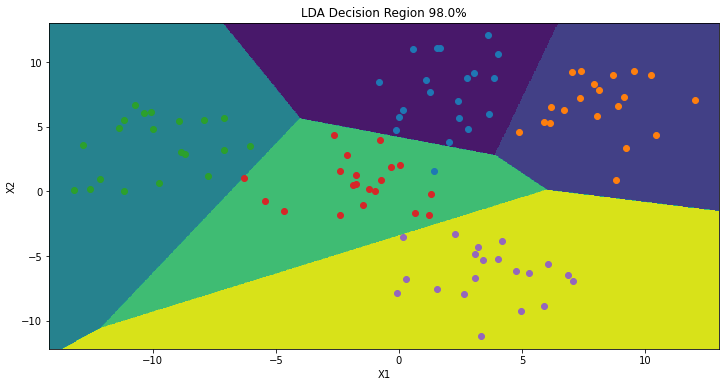

In [7]:
plot_DR(X, y, LDA, 'LDA Decision Region {}'.format(acc), h=0.05)

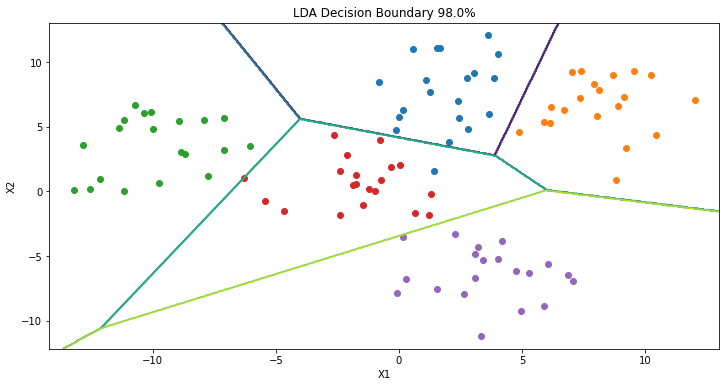

In [8]:
plot_DB(X, y, LDA, 'LDA Decision Boundary {}'.format(acc), h=0.05)

### 2) QDA

In [9]:
QDA = GDA('QDA')
QDA.fit(X, y)

In [10]:
acc = str(100*sum(QDA.predict(X)==y)/len(y))+'%'
print('Accuracy: {}'.format(acc))

Accuracy: 99.0%


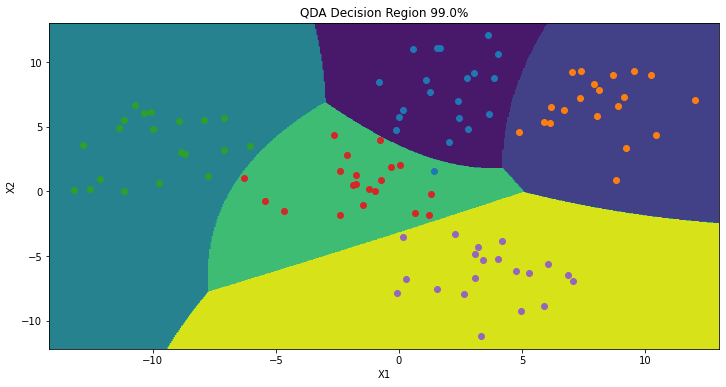

In [11]:
plot_DR(X, y, QDA, 'QDA Decision Region {}'.format(acc), h=0.05)

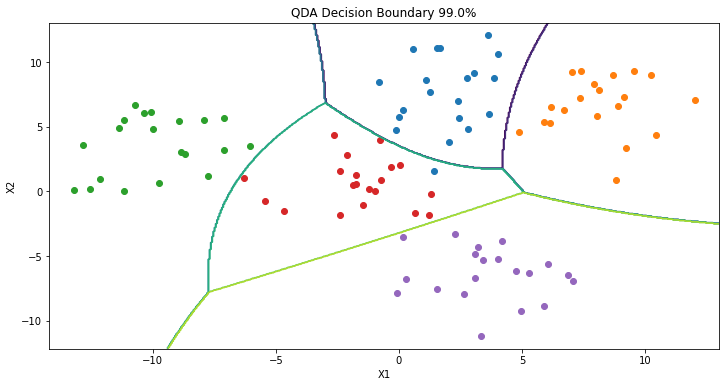

In [12]:
plot_DB(X, y, QDA, 'QDA Decision Boundary {}'.format(acc), h=0.05)

> - <h4> The QDA is more accurate than LDA.</h4>
> - <h4> In terms Bias-Variance decomposition, the QDA is more complex than the LDA and more prone to overfitting.</h4>